In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Análisis exploratorio de los datos:  (Exploratory Data Analysis-EDA)



In [66]:
# Cargamos el dataset de las 4 plataformas

df = pd.read_csv('data_score_titles.csv')
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,3.4671
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,3.5487


In [67]:
df_total = pd.read_csv('data_total.csv')
df_total.head(2)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_15128\2070674332.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv('data_total.csv')


,id,type,title,director,cast,country,date_added,release_year,rating_x,duration_int,duration_type,listed_in,description,userId,rating_y,timestamp,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,543,5.0,1059596582,3.4671
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,595,3.0,839937603,3.4671


In [68]:
# Vemos la informacion del dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_int   22998 non-null  int64  
 10  duration_type  22516 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  score          22998 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 2.5+ MB


In [69]:
# Vemos la cantidad de valores nulos por columna.
df.isnull().sum()


id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration_int         0
duration_type      482
listed_in            0
description          4
score                0
dtype: int64

#### Hacemos una Analisis por columna

### Director

In [70]:
# Vemos la cantidad de veces que dirigio cada 'director'. 
df.director.value_counts()

mark knight              113
cannis holder             61
jay chapman               46
moonbug entertainment     37
arthur van merwijk        30
                        ... 
charles wilkinson          1
dominic brunt              1
sean breathnach            1
cindy jansen               1
mozez singh                1
Name: director, Length: 10095, dtype: int64

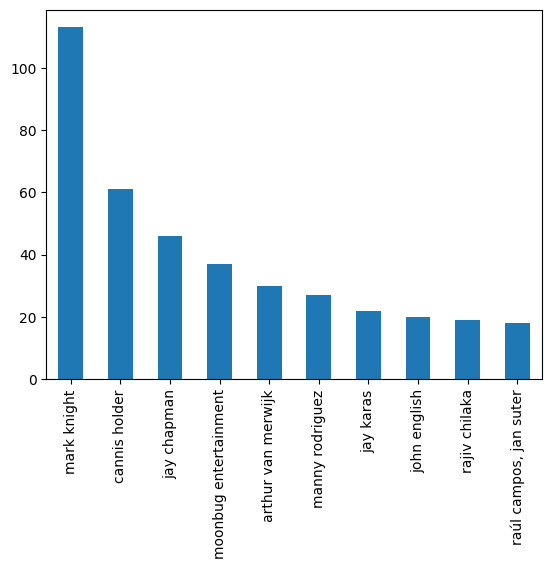

In [71]:
# Para mayor interpretacion, lo graficamos en un grafico de barras. 
# Vemos los primeros 10 directores con mayor peliculas o series.
df['director'].value_counts().head(10).plot(kind = 'bar' )
plt.show()

### Cast

In [72]:
# Cargamos en una lista todos los actores.

lista = []
lista_split = []

for i in df.cast:
    if i is np.nan: 
        continue
    lista.append(i)
        
for i in lista:
    for j in i.split(','):
        lista_split.append(j.strip())

In [73]:
# Vemos los actores con mayor participacion y el total de actores. 
df_cast = pd.DataFrame(lista_split)
df_cast.value_counts()

anupam kher         60
maggie binkley      56
amitabh bachchan    47
shah rukh khan      46
jim cummings        44
                    ..
jackie radinsky      1
jackie van beek      1
jackie wade          1
jackky bhagnani      1
齋藤雅弘                 1
Length: 62283, dtype: int64

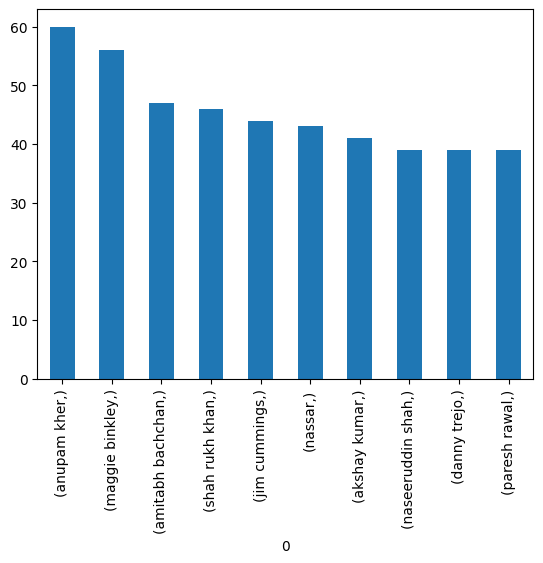

In [74]:
# Graficamos los 10 actores con mayor participacion. 
# Para mayor interpretacion, lo graficamos en un grafico de barras. 
df_cast.value_counts().head(10).plot(kind = 'bar' )
plt.show()


#### Country

In [75]:
# Vemos de que paises son las peliculas y series.
df.country.value_counts()

united states                                                  4997
india                                                          1203
united kingdom                                                  583
japan                                                           515
canada                                                          237
                                                               ... 
lebanon, united arab emirates, france, switzerland, germany       1
france, belgium, italy                                            1
lebanon, united states, united arab emirates                      1
lebanon, france                                                   1
united arab emirates, jordan                                      1
Name: country, Length: 886, dtype: int64

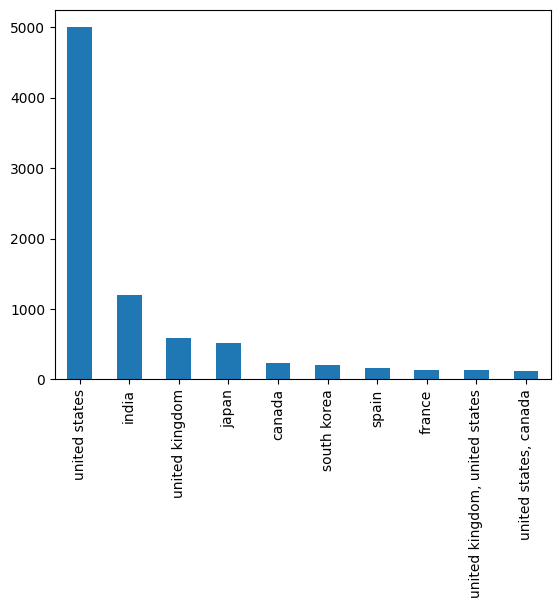

In [76]:
# Para mayor interpretacion, lo graficamos en un grafico de barras. 
# Vemos los primeros 10 paises con mayor peliculas o series.
df['country'].value_counts().head(10).plot(kind = 'bar' )
plt.show()

### Generos

In [77]:
# Cargamos en una lista todos los generos.

lista = []
lista_split = []

for i in df.listed_in:
    if i is np.nan: 
        continue
    lista.append(i)
        
for i in lista:
    for j in i.split(','):
        lista_split.append(j.strip())

In [78]:
# Vemos los generos que mas se repiten, y el total de generos que hay. 
df_generos = pd.DataFrame(lista_split)
df_generos.value_counts()

drama                     4728
comedy                    3292
international movies      2752
dramas                    2427
action                    2212
                          ... 
soap opera / melodrama       2
romantic comedy              2
talk show                    1
travel                       1
police/cop                   1
Length: 120, dtype: int64